In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 10
train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/test'

# Data preparation using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# **Determine the correct number of classes**
num_classes = len(train_dataset.class_names)  # Get the number of classes from the dataset



Found 15590 files belonging to 23 classes.
Found 4029 files belonging to 23 classes.


In [2]:
# Load the pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [3]:
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# **Use num_classes in the final Dense layer**
predictions = Dense(num_classes, activation='softmax')(x)


In [4]:

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)


Epoch 1/10
488/488 [==============================] - 339s 674ms/step - loss: 2.3969 - accuracy: 0.3013 - val_loss: 2.1793 - val_accuracy: 0.3596
Epoch 2/10
488/488 [==============================] - 321s 656ms/step - loss: 1.9647 - accuracy: 0.4127 - val_loss: 2.0885 - val_accuracy: 0.3822
Epoch 3/10
488/488 [==============================] - 319s 653ms/step - loss: 1.7056 - accuracy: 0.4806 - val_loss: 2.1085 - val_accuracy: 0.3877
Epoch 4/10
488/488 [==============================] - 318s 650ms/step - loss: 1.4809 - accuracy: 0.5438 - val_loss: 2.0492 - val_accuracy: 0.4130
Epoch 5/10
488/488 [==============================] - 318s 650ms/step - loss: 1.2501 - accuracy: 0.6129 - val_loss: 2.1055 - val_accuracy: 0.4212
Epoch 6/10
488/488 [==============================] - 322s 659ms/step - loss: 1.0683 - accuracy: 0.6666 - val_loss: 2.1987 - val_accuracy: 0.4177
Epoch 7/10
488/488 [==============================] - 317s 650ms/step - loss: 0.8909 - accuracy: 0.7210 - val_loss: 2.1912 -

In [3]:
model.save('resnet50_image_classifier1.keras')
print("Model training complete and saved in Keras format.")


Model training complete and saved in Keras format.


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('resnet50_image_classifier1.keras')

img_path = '/content/drive/MyDrive/demoimg for img classif of skin diseases/bullous.webp'

# Check if the file exists (for local environments)
import os
if not os.path.isfile(img_path):
    raise FileNotFoundError(f"The file at {img_path} does not exist.")

# Preprocess the image
img_height, img_width = 224, 224  # Same as used in training
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Preprocess for ResNet50

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
predicted_class = np.argmax(predictions, axis=-1)
class_names = train_dataset.class_names  # Use the same class names as in training
predicted_label = class_names[predicted_class[0]]

print(f"Predicted label: {predicted_label}")

1/1 [==============================] - 1s 1s/step
Predicted label: Scabies Lyme Disease and other Infestations and Bites


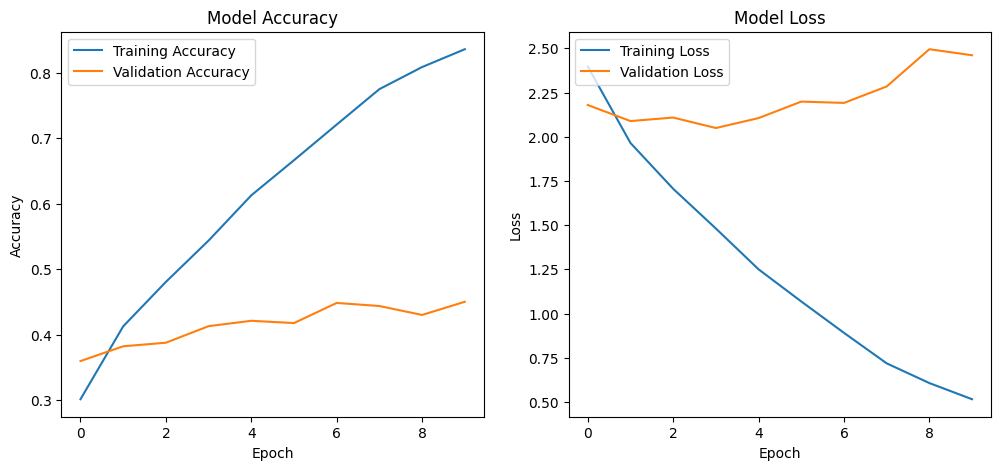

In [15]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()
